In [4]:
import numpy as np
import pandas as pd


id_stopword_dict = pd.read_csv('/Users/imamghozali/Documents/Master/Semester1/RPL/Data/stopwordbahasa.csv', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

# print(id_stopword_dict)
data1 = pd.read_csv("/Users/imamghozali/Documents/Master/Semester1/RPL/Data/IDHSD_RIO_unbalanced_713_2017.txt",
                    sep=" ", delimiter="\t", encoding='latin-1')

alay_dict = pd.read_csv('/Users/imamghozali/Documents/Master/Semester1/RPL/Data/new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})

data1['Label'] = data1['Label'].map({'Non_HS': 1, 'HS': 0})

print(data1)
# print(data1.values[0][0])

     Label                                              Tweet
0        1  RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1        1  RT @baguscondromowo: Mereka terus melukai aksi...
2        1  Sylvi: bagaimana gurbernur melakukan kekerasan...
3        1  Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...
4        1  RT @lisdaulay28: Waspada KTP palsu.....kawal P...
..     ...                                                ...
708      0  Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....
709      0  Betul bang hancurkan merka bang, musnahkan chi...
710      0  Sapa Yg bilang Ahok anti korupsi!?, klo grombo...
711      0  Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar...
712      0  Mudah2an gw ketemu sama SI BABI IWAN BOPENG DI...

[713 rows x 2 columns]


/Users/imamghozali/opt/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Label', ylabel='count'>

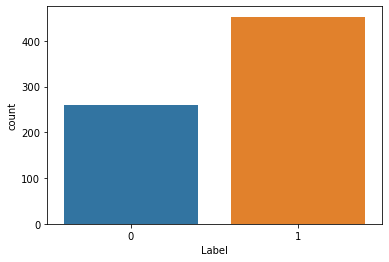

In [5]:
import seaborn as sns

sns.countplot('Label',data=data1)


In [7]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from nltk.tokenize import word_tokenize 
import nltk
# from keras.preprocessing.text import Tokenizer

# nltk.download()

def lowercase(text):
    return text.lower()


def remove_unnecessary_char(text):
    # Remove every URL
    text = re.sub(
        '((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', ' ', text)
    text = re.sub('\n', ' ', text)  # Remove every '\n'
    text = re.sub('\r', ' ', text)  # Remove every '\r'
    text = re.sub('(?i)rt', ' ', text)  # Remove every retweet symbol
    text = re.sub('@[^\s]+[ \t]', '', text)  # Remove every username
    text = re.sub('(?i)user', '', text)  # Remove every username
    text = re.sub('(?i)url', ' ', text)  # Remove every url
    text = re.sub(r'\\x..', ' ', text)  # Remove every emoji
    text = re.sub('  +', ' ', text)  # Remove extra spaces
    # Remove characters repeating more than twice
    text = re.sub(r'(\w)\1{2,}', r'\1\1', text)

    return text


def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    return text


alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))


def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])


def remove_stopword(text):
    text = ' '.join(
        ['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text)  # Remove extra spaces
    text = text.strip()
    return text


def stemming(text):
    return stemmer.stem(text)


def preprocess(text):
    text = lowercase(text)
    text = remove_unnecessary_char(text)
    text = remove_nonaplhanumeric(text)
    text = normalize_alay(text)
    text = remove_stopword(text)
    text = stemming(text)
    # text = nltk.tokenize.word_tokenize(text)
    ordered_tokens = set()
    result = []
    # filter duplicate words
    # for word in text:
    #     if word not in ordered_tokens:
    #         ordered_tokens.add(word)
    #         result.append(word)
    # text = result      
    return text

print(preprocess("@saidaqil Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."))
print(preprocess("@saidaqil apa maksud pernyataan. Anda? Apa anda mengaminkan kriminalisasi Ahok?? Hati2 jg dg mulutmu pak!"))
# data1 = data1.drop(['HS'], axis=1)
# result = []
# for item in data1.iloc[:, 0]:
#     # for num in item:    
#         # print(preprocess(item))
#         result.append(preprocess(item))

# print(result[0])
data1['Tweet']=data1['Tweet'].apply(preprocess)

andi kerap transaksi rutin daring online andi belanja online praktis murah
maksud nyata amin kriminalisasi ahok hati hati mulut


In [8]:
x=data1['Tweet']
y=data1['Label']

data1.head()

,Label,Tweet
0,1,fadli zon menteri negeri nonaktif ahok gubernu...
1,1,luka aksi rangka penjara ahok ahok gagal pilih...
2,1,sylvi gurbernur keras perempuan bukti foto bar...
3,1,ahmad dhani puas debat pilih kepala daerah jal...
4,1,waspada kartu tanda duduk palsu kawal pilih ke...


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=0.2)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

570 570
143 143


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(ngram_range=(1,2))
x_train_vectorizer=count.fit_transform(x_train)

In [11]:
x_test_vectorizer=count.transform(x_test)
x_train_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

x_train_tfidf = tfidf.fit_transform(x_train_vectorizer)

x_train_tfidf.toarray()
x_test_tfidf = tfidf.transform(x_test_vectorizer)

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [14]:
model_vectorizer= MultinomialNB().fit(x_train_vectorizer, y_train)
prediction_vectorizer=model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,prediction_vectorizer))
print (classification_report(y_test, prediction_vectorizer))

[[38  7]
 [13 85]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        45
           1       0.92      0.87      0.89        98

    accuracy                           0.86       143
   macro avg       0.83      0.86      0.84       143
weighted avg       0.87      0.86      0.86       143



In [15]:
model_tfidf= MultinomialNB().fit(x_train_tfidf, y_train)
prediction_tfidf=model_tfidf.predict(x_test_tfidf)
print(confusion_matrix(y_test,prediction_tfidf))
print (classification_report(y_test, prediction_tfidf))


[[29 16]
 [ 5 93]]
              precision    recall  f1-score   support

           0       0.85      0.64      0.73        45
           1       0.85      0.95      0.90        98

    accuracy                           0.85       143
   macro avg       0.85      0.80      0.82       143
weighted avg       0.85      0.85      0.85       143



In [16]:

from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential

Using TensorFlow backend.
/Users/imamghozali/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/imamghozali/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/imamghozali/opt/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16",

In [17]:
max_words = 5000
max_len = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [18]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          500000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 580,501
Trainable params: 580,501
Non-trainable params: 0
_________________________________________________________________


In [19]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_acc', 
    mode='max',
    patience=5
)

checkpoint= ModelCheckpoint(
    filepath='./model_txt',
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

In [30]:
history=model.fit(sequences_matrix,y_train,batch_size=1024,epochs=10,
          validation_split=0.2,callbacks=[stop,checkpoint])

Train on 456 samples, validate on 114 samples
Epoch 1/10
456/456 [==============================] - 3s 7ms/step - loss: 0.1619 - acc: 0.9781 - val_loss: 0.3572 - val_acc: 0.8684
Epoch 2/10
456/456 [==============================] - 3s 7ms/step - loss: 0.1497 - acc: 0.9737 - val_loss: 0.3466 - val_acc: 0.8860
Epoch 3/10
456/456 [==============================] - 3s 7ms/step - loss: 0.1379 - acc: 0.9825 - val_loss: 0.3394 - val_acc: 0.8860
Epoch 4/10
456/456 [==============================] - 3s 7ms/step - loss: 0.1323 - acc: 0.9781 - val_loss: 0.3858 - val_acc: 0.8509
Epoch 5/10
456/456 [==============================] - 3s 7ms/step - loss: 0.1390 - acc: 0.9912 - val_loss: 0.3416 - val_acc: 0.8772
Epoch 6/10
456/456 [==============================] - 3s 7ms/step - loss: 0.1130 - acc: 0.9846 - val_loss: 0.3354 - val_acc: 0.8509
Epoch 7/10
456/456 [==============================] - 3s 7ms/step - loss: 0.1027 - acc: 0.9825 - val_loss: 0.3332 - val_acc: 0.8772


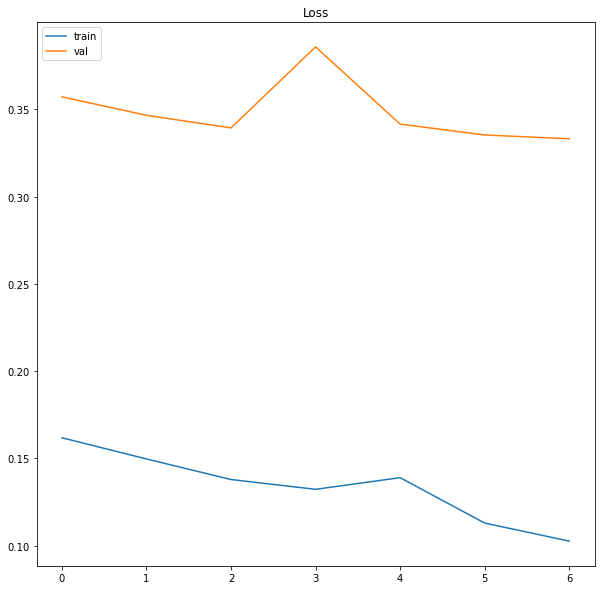

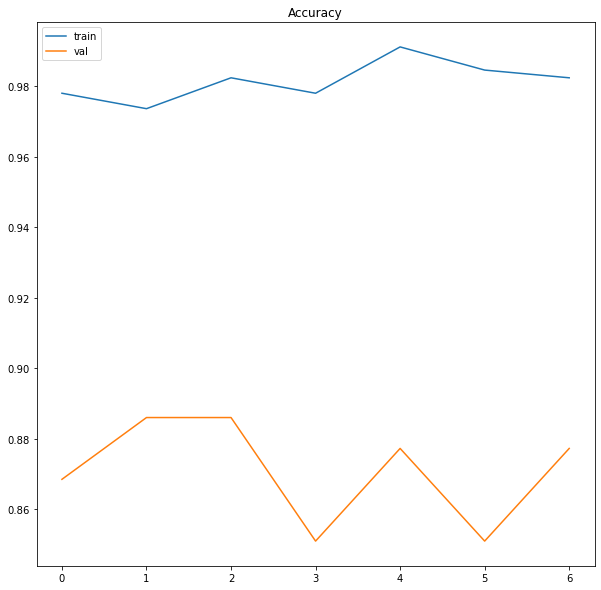

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)


In [33]:
accr = model.evaluate(test_sequences_matrix,y_test)


143/143 [==============================] - 1s 9ms/step


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

lstm_prediction=model.predict(test_sequences_matrix)
res=[]
for prediction in lstm_prediction:
    if prediction[0]<0.5:
        res.append(0)
    else:
        res.append(1)
print(confusion_matrix(y_test,res))
print (classification_report(y_test, res))


[[32 13]
 [11 87]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        45
           1       0.87      0.89      0.88        98

    accuracy                           0.83       143
   macro avg       0.81      0.80      0.80       143
weighted avg       0.83      0.83      0.83       143



In [34]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [35]:
model.save("hate_model.h5")

In [36]:
import keras
load_model=keras.models.load_model("./hate_model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [37]:
test = "- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'"

test=[preprocess(test)]
print(test)
seq = load_tokenizer.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=200)
print(seq)
pred = load_model.predict(padded)
print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")

['cowok usaha lacak perhati gue lantas remeh perhati gue kasih khusus basic cowok bego']
[[293, 141, 3866, 628, 4, 2507, 3243, 628, 4, 72, 145, 293, 208]]
pred [[0.00095039]]
no hate


In [45]:
data2=data1


In [46]:
data2 = data2['Tweet'].apply(preprocess)

In [47]:
data2.head(5)

0    cowok usaha lacak perhati gue lantas remeh per...
1    telat tau edan sarap gue gaul cigax jifla cal ...
2    41 kadang pikir percaya tuhan jatuh kali kali ...
3                                    ku tau mata sipit
4                   kaum cebong kafir dungu dungu haha
Name: Tweet, dtype: object

In [48]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer2 = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer2.fit_on_texts(data2.values)
word_index = tokenizer2.word_index
print('Found %s unique tokens.' % len(word_index))

Found 12422 unique tokens.


In [49]:
X = tokenizer2.texts_to_sequences(data2.values)
X = sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (13169, 250)


In [50]:
Y=data1['HS']

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(10535, 250) (10535,)
(2634, 250) (2634,)


In [52]:
model2 = Sequential()
model2.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model2.add(SpatialDropout1D(0.2))
model2.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

epochs = 10
batch_size = 1024

history2 = model2.fit(X_train, Y_train, epochs=epochs,batch_size=batch_size,validation_split=0.2,callbacks=[stop,checkpoint])

Train on 8428 samples, validate on 2107 samples
Epoch 1/10
8428/8428 [==============================] - 66s 8ms/step - loss: 0.6753 - acc: 0.5819 - val_loss: 0.6504 - val_acc: 0.5928
Epoch 2/10


/Users/imamghozali/opt/anaconda3/envs/python36/lib/python3.6/site-packages/keras/callbacks.py:535: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/Users/imamghozali/opt/anaconda3/envs/python36/lib/python3.6/site-packages/keras/callbacks.py:432: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


8428/8428 [==============================] - 73s 9ms/step - loss: 0.6100 - acc: 0.6954 - val_loss: 0.5825 - val_acc: 0.7632
Epoch 3/10
8428/8428 [==============================] - 74s 9ms/step - loss: 0.5162 - acc: 0.8231 - val_loss: 0.5086 - val_acc: 0.7803
Epoch 4/10
8428/8428 [==============================] - 69s 8ms/step - loss: 0.4216 - acc: 0.8367 - val_loss: 0.4593 - val_acc: 0.8016
Epoch 5/10
8428/8428 [==============================] - 70s 8ms/step - loss: 0.3590 - acc: 0.8626 - val_loss: 0.4255 - val_acc: 0.8092
Epoch 6/10
8428/8428 [==============================] - 74s 9ms/step - loss: 0.3133 - acc: 0.8755 - val_loss: 0.4166 - val_acc: 0.8102
Epoch 7/10
8428/8428 [==============================] - 79s 9ms/step - loss: 0.2947 - acc: 0.8809 - val_loss: 0.4147 - val_acc: 0.8178
Epoch 8/10
8428/8428 [==============================] - 87s 10ms/step - loss: 0.2534 - acc: 0.8994 - val_loss: 0.4480 - val_acc: 0.7879
Epoch 9/10
8428/8428 [==============================] - 87s 10ms/

In [53]:
accr = model2.evaluate(X_test,Y_test)


2634/2634 [==============================] - 30s 11ms/step


In [54]:
lstm_prediction2=model2.predict(X_test)
print(lstm_prediction2[0:5])
res2=[]
for prediction in lstm_prediction2:
    if prediction[0]<0.45:
        res2.append(0)
    else:
        res2.append(1)

[[0.9762091 ]
 [0.00631766]
 [0.03874571]
 [0.49160764]
 [0.4598291 ]]


In [59]:
print(confusion_matrix(Y_test,res2))
print (classification_report(Y_test, res2))



[[1241  275]
 [ 198  920]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1516
           1       0.77      0.82      0.80      1118

    accuracy                           0.82      2634
   macro avg       0.82      0.82      0.82      2634
weighted avg       0.82      0.82      0.82      2634



In [58]:
test = "- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'"

test=[preprocess(test)]
print(test)
seq = tokenizer2.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=250)
print(seq)
pred = model2.predict(padded)
print("pred", pred)
if pred<0.45:
    print("no hate")
else:
    print("hate and abusive")

['cowok usaha lacak perhati gue lantas remeh perhati gue kasih khusus basic cowok bego']
[[304, 151, 3433, 582, 4, 1951, 2494, 582, 4, 74, 128, 4971, 304, 194]]
pred [[0.10678127]]
no hate
